In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from prophet import Prophet
from forecastTable import forecastTable
from columnCleaner import columnCleaner

Importing plotly failed. Interactive plots will not work.


In [3]:
train_obs = pd.read_csv("data/observations_train.csv")
test_obs = pd.read_csv("data/observations_test.csv")
series = pd.read_csv("data/series.csv")

normalize = lambda col: (col-col.mean())/col.std()
normed_obs = train_obs.pivot_table(values="value", index="date", columns="series_id")
normed_obs = normed_obs.apply(normalize, axis=0)
test_obs['date'].unique()[-1]

'2021-02-12 00:00:00.0000000'

In [4]:
cols = list(set(series['series_id'].unique()) - set(['SP500']))
# cols = ['GVIPT54000S']
# cols = ["PCUADLVWRADLVWR",
# "PCUAINFOAINFO",
# "PCUAMUMAMUM",
# "PCUARETTRARETTR",
# "PCUASHCASHC",
# "PCUASTDSVASTDSV",
# "PCUATRADEATRADE",
# "PCUATRANSATRANS",
# "PCUATRNWRATRNWR",
# "PCUATTDSVATTDSV",
# "PCUAWHLTRAWHLTR",
# "PCUOMFGOMFG",
# "PCUOMINOMIN"]
features = columnCleaner("data/observations_train.csv", columns=cols)

Dropping Column: SOFR
Dropping Column: DEXJPUS
Dropping Column: SOFRVOL


Not included: DEXJPUS, SOFR, and SOFRVOL

In [5]:
m = Prophet()
dropped_cols = ["DEXJPUS", "SOFR", "SOFRVOL"]
for c in cols:
    if c not in dropped_cols:
        m.add_regressor(c, standardize=False)

In [6]:
m.fit(features)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
horizon = 900
cols = list(set(cols) - set(dropped_cols))
forecast = forecastTable(m,
                         horizon, 
                         "data/observations_train.csv", 
                         "data/observations_test.csv",
                        columns=cols)

In [8]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,AAA10Y,AAA10Y_lower,AAA10Y_upper,ASEANTOT,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-02-14,-1.213354,-1.130170,-0.989342,-1.213354,-1.213354,-0.005759,-0.005759,-0.005759,0.089447,...,0.013756,0.013756,0.013756,0.025193,0.025193,0.025193,0.0,0.0,0.0,-1.057965
1,2011-02-15,-1.212176,-1.130027,-0.983707,-1.212176,-1.212176,-0.023810,-0.023810,-0.023810,0.089447,...,0.013707,0.013707,0.013707,0.029605,0.029605,0.029605,0.0,0.0,0.0,-1.060403
2,2011-02-16,-1.210997,-1.155496,-1.004881,-1.210997,-1.210997,-0.023810,-0.023810,-0.023810,0.089447,...,0.010770,0.010770,0.010770,0.033638,0.033638,0.033638,0.0,0.0,0.0,-1.078986
3,2011-02-17,-1.209819,-1.140077,-0.990953,-1.209819,-1.209819,-0.032835,-0.032835,-0.032835,0.089447,...,0.008856,0.008856,0.008856,0.037273,0.037273,0.037273,0.0,0.0,0.0,-1.064890
4,2011-02-18,-1.208641,-1.103087,-0.953726,-1.208641,-1.208641,-0.038852,-0.038852,-0.038852,0.089447,...,0.008878,0.008878,0.008878,0.040500,0.040500,0.040500,0.0,0.0,0.0,-1.029859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,2020-06-14,5.105645,2.923024,3.379913,4.897979,5.322555,-0.068936,-0.068936,-0.068936,-0.039544,...,-0.027984,-0.027984,-0.027984,0.063191,0.063191,0.063191,0.0,0.0,0.0,3.145176
3409,2020-06-15,5.107568,2.967967,3.413032,4.899617,5.324813,-0.068936,-0.068936,-0.068936,-0.039544,...,0.013756,0.013756,0.013756,0.060327,0.060327,0.060327,0.0,0.0,0.0,3.185975
3410,2020-06-16,5.109491,3.066303,3.511675,4.901081,5.327070,-0.014784,-0.014784,-0.014784,-0.039544,...,0.013707,0.013707,0.013707,0.057553,0.057553,0.057553,0.0,0.0,0.0,3.276930
3411,2020-06-17,5.111413,3.037818,3.479141,4.902545,5.329327,-0.035843,-0.035843,-0.035843,-0.039544,...,0.010770,0.010770,0.010770,0.054924,0.054924,0.054924,0.0,0.0,0.0,3.253834


In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='ds'>

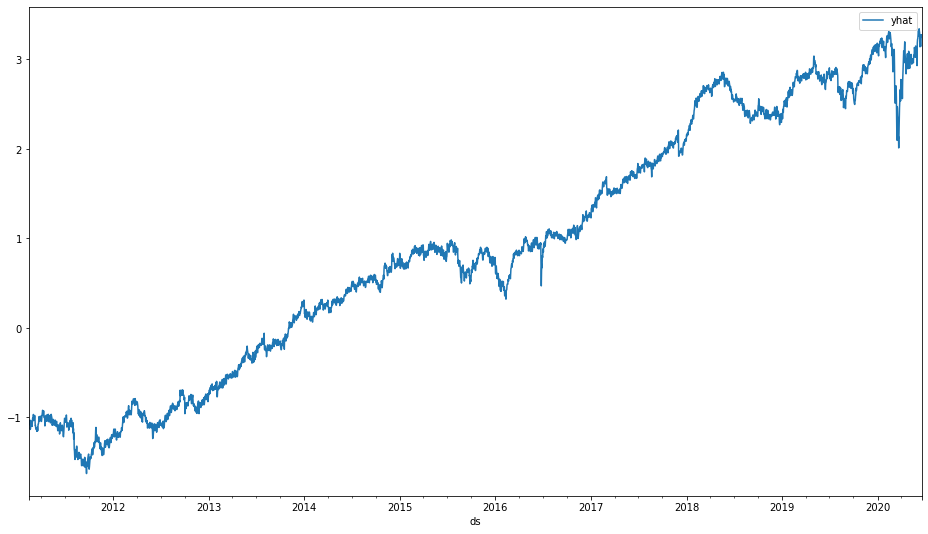

In [10]:
fig, ax = plt.subplots(figsize=(16, 9))
forecast[['ds', 'yhat']].plot("ds", ax=ax)
# ax.set_xlim(['2020-01-01', '2020-06-18'])

In [11]:
from prophet.utilities import regressor_coefficients

factors = regressor_coefficients(m)
factors['abs_coef'] = abs(factors['coef'])
factors.sort_values("abs_coef", ascending=True, inplace=True)
factors

,regressor,regressor_mode,center,coef_lower,coef,coef_upper,abs_coef
22,OBFRVOL,additive,0.0,0.002012,0.002012,0.002012,0.002012
52,EFFRVOL,additive,0.0,0.005947,0.005947,0.005947,0.005947
27,INFECTDISEMVTRACKD,additive,0.0,-0.007194,-0.007194,-0.007194,0.007194
37,CBUSAPPWNSAUS,additive,0.0,0.015138,0.015138,0.015138,0.015138
66,UNRATE,additive,0.0,0.016276,0.016276,0.016276,0.016276
...,...,...,...,...,...,...,...
42,PCUASTDSVASTDSV,additive,0.0,1.336476,1.336476,1.336476,1.336476
1,GVIPT54000S,additive,0.0,-1.783974,-1.783974,-1.783974,1.783974
10,PCUATTDSVATTDSV,additive,0.0,-2.152529,-2.152529,-2.152529,2.152529
32,PCUATRANSATRANS,additive,0.0,-2.225161,-2.225161,-2.225161,2.225161


<AxesSubplot:ylabel='regressor'>

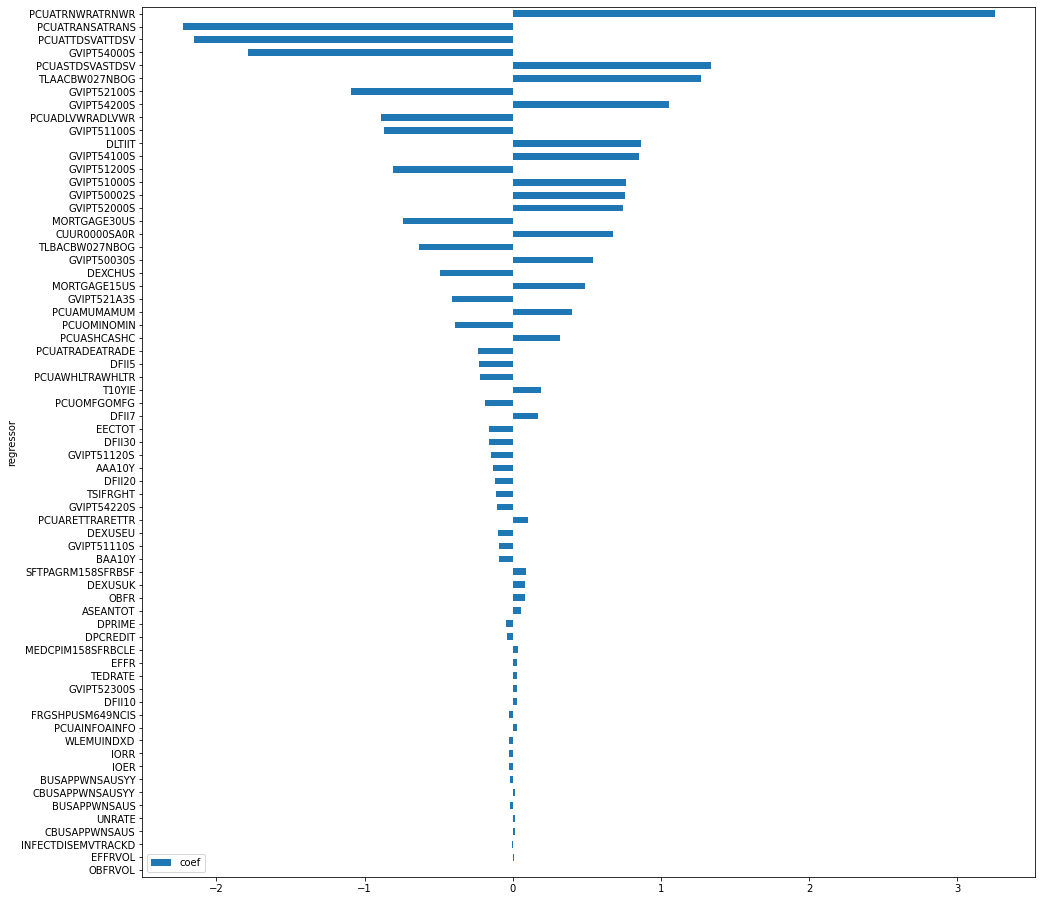

In [12]:
fig, ax = plt.subplots(figsize=(16, 16))
pcucols = ["PCUADLVWRADLVWR",
"PCUAINFOAINFO",
"PCUAMUMAMUM",
"PCUARETTRARETTR",
"PCUASHCASHC",
"PCUASTDSVASTDSV",
"PCUATRADEATRADE",
"PCUATRANSATRANS",
"PCUATRNWRATRNWR",
"PCUATTDSVATTDSV",
"PCUAWHLTRAWHLTR",
"PCUOMFGOMFG",
"PCUOMINOMIN"]
factors.plot.barh('regressor', 'abs_coef', ax=ax)

In [13]:
t = pd.concat([normed_obs.corr()['SP500'], normalize(factors.set_index("regressor")['coef'])], axis=1)

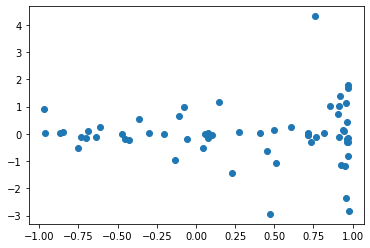

In [14]:
plt.scatter(t.SP500, t.coef)

In [15]:
wild_cards = ['UNRATE', 'INFECTDISEMVTRACKD']
top_cols = factors.sort_values("abs_coef", ascending=False)['regressor'].values
top_cols

array(['PCUATRNWRATRNWR', 'PCUATRANSATRANS', 'PCUATTDSVATTDSV',
       'GVIPT54000S', 'PCUASTDSVASTDSV', 'TLAACBW027NBOG', 'GVIPT52100S',
       'GVIPT54200S', 'PCUADLVWRADLVWR', 'GVIPT51100S', 'DLTIIT',
       'GVIPT54100S', 'GVIPT51200S', 'GVIPT51000S', 'GVIPT50002S',
       'GVIPT52000S', 'MORTGAGE30US', 'CUUR0000SA0R', 'TLBACBW027NBOG',
       'GVIPT50030S', 'DEXCHUS', 'MORTGAGE15US', 'GVIPT521A3S',
       'PCUAMUMAMUM', 'PCUOMINOMIN', 'PCUASHCASHC', 'PCUATRADEATRADE',
       'DFII5', 'PCUAWHLTRAWHLTR', 'T10YIE', 'PCUOMFGOMFG', 'DFII7',
       'EECTOT', 'DFII30', 'GVIPT51120S', 'AAA10Y', 'DFII20', 'TSIFRGHT',
       'GVIPT54220S', 'PCUARETTRARETTR', 'DEXUSEU', 'GVIPT51110S',
       'BAA10Y', 'SFTPAGRM158SFRBSF', 'DEXUSUK', 'OBFR', 'ASEANTOT',
       'DPRIME', 'DPCREDIT', 'MEDCPIM158SFRBCLE', 'EFFR', 'TEDRATE',
       'GVIPT52300S', 'DFII10', 'FRGSHPUSM649NCIS', 'PCUAINFOAINFO',
       'WLEMUINDXD', 'IORR', 'IOER', 'BUSAPPWNSAUSYY', 'CBUSAPPWNSAUSYY',
       'BUSAPPWNSAUS', 'UNRATE'

In [153]:
from prophet.diagnostics import performance_metrics, cross_validation
from concurrent.futures import ProcessPoolExecutor

def eval_model(f):
    """train and evaluate model crossvalidation on f factors."""
    m = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=0.01)
    feat, _, _ = columnCleaner("data/observations_train.csv", columns=f)
    dropped_cols = ["DEXJPUS", "SOFR", "SOFRVOL"]
    for c in f:
        if c not in dropped_cols:
            m.add_regressor(c, standardize=False)
    m.fit(feat)
    cv_1yr = cross_validation(m, initial='365 days', period="180 days", horizon='1 day', parallel='processes')
    cv_1mo = cross_validation(m, initial='30 days', period="180 days", horizon='1 day', parallel='processes')
    cv_1wk = cross_validation(m, initial='7 days', period="180 days", horizon='1 day', parallel='processes')
    
    perf_1yr = performance_metrics(cv_1yr).iloc[0]['mape']
    perf_1mo = performance_metrics(cv_1mo).iloc[0]['mape']
    perf_1wk = performance_metrics(cv_1wk).iloc[0]['mape']
    
    return [perf_1wk, perf_1mo, perf_1yr]

def run_models(i):
    """run the models."""
    # model1 - no wildcards
    fctrs = top_cols[:i]
# #     print(fctrs)
#     one = eval_model(fctrs)

#     # model2 - UNRATE
#     fctrs2 = np.append(fctrs, 'UNRATE')
# #     print(fctrs2)
#     two = eval_model(fctrs2)

    # model3 - INFECTDISEMVTRACKD
    fctrs3 = np.append(fctrs, 'INFECTDISEMVTRACKD')
#     print(fctrs3)
    three = eval_model(fctrs3)

#     # model4 - both
#     fctrs4 = np.append(fctrs3, 'UNRATE')
# #     print(fctrs4)
#     four = eval_model(fctrs4)
    return three
    return (one, two, three, four)

# with ProcessPoolExecutor() as executor:
#     l = list(executor.map(run_models, range(1, 11)))
perfs = []

for i in range(1, 16):
    print("Now Running:", i)
    perfs.append(run_models(i))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Now Running: 1


INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90520c730>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9052032b0>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9053e1c10>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Now Running: 2


INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90520c730>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9053daa00>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9053e1f10>


Now Running: 3


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9053da370>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9051dbf40>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90520caf0>


Now Running: 4


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff905421340>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90544aaf0>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90542a280>


Now Running: 5


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90542a280>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9053daf70>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9053da610>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Now Running: 6


INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff905400f10>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff905203f10>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90520cd90>


Now Running: 7


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff905430e20>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90541acd0>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90541a940>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Now Running: 8


INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff905530eb0>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90542a280>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff905400f10>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Now Running: 9


INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff903c316a0>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90520c490>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9037e71f0>


Now Running: 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90380fc40>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff905a55970>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff905a558b0>


Now Running: 11


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90611a940>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9035b0640>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff904acc1f0>


Now Running: 12


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff91f7ae4c0>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9060a57c0>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90610fa00>


Now Running: 13


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff907074eb0>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff905a6b400>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9038bc940>


Now Running: 14


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9037f00a0>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9037f00a0>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9055f22e0>


Now Running: 15


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90387d7c0>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90398e460>
INFO:prophet:Making 14 forecasts with cutoffs between 2011-07-07 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9051fd100>


        Week     Month      Year
0   0.160057  0.160057  0.184555
1   0.125416  0.125416  0.144136
2   0.153408  0.153408  0.176897
3   0.162390  0.162390  0.187181
4   0.211274  0.211274  0.244059
5   0.201076  0.201076  0.231941
6   0.204007  0.204007  0.235440
7   0.239490  0.239490  0.276469
8   0.101424  0.101424  0.115505
9   0.116150  0.116150  0.133180
10  0.112771  0.112771  0.130582
11  0.108750  0.108750  0.125876
12  0.202550  0.202550  0.235319
13  0.202943  0.202943  0.235907
14  0.219353  0.219353  0.254883


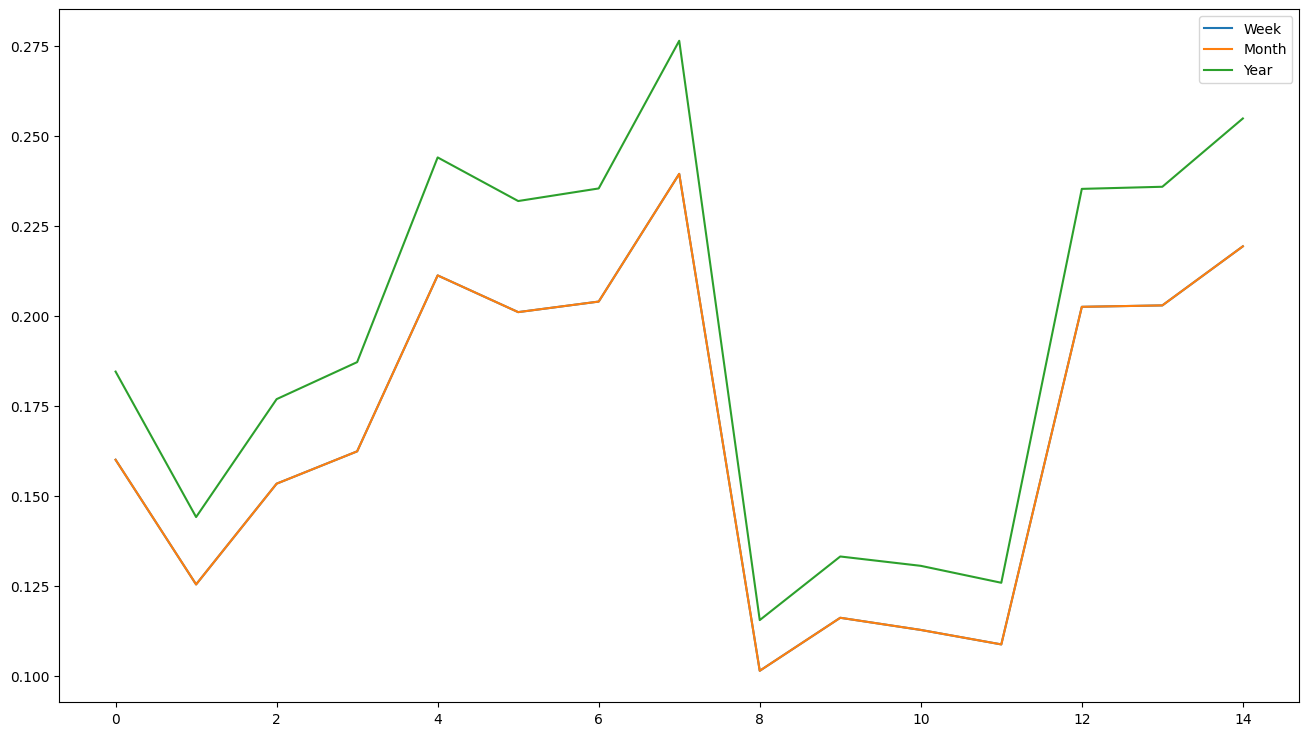

In [231]:
perfs = pd.DataFrame(perfs, columns=['Week', 'Month', 'Year'])
print(perfs)
fig, ax = plt.subplots(figsize=(16, 9))
perfs.plot(ax=ax)
plt.show()
perfs.to_csv("model_perfs.csv")

In [ ]:
%time eval_model(top_cols[:21])

In [20]:
oneseventwozero = [(2.5380135361595095,
  3.4752944824347294,
  2.595920158363373,
  3.689808284365746),
 (2.5208146411166226, 3.741774828971389, 2.599282416240165, 3.571801069761113),
 (2.5632666101838217,
  3.629799022972571,
  2.6094263354521012,
  3.6193939626579774),
 (1.8564845410618511,
  2.6339568101526694,
  1.863429723686856,
  2.6667454134128956)]

In [25]:
firstten = [(3.31440167665234, 2.2019827662180855, 3.242194235334837, 2.1508165939278125),
 (3.2452444043137394,
  2.194939328679657,
  3.3123241408814135,
  2.2030626808566076),
 (3.094207117775177, 2.2192052954753296, 3.11053678319414, 2.140583631296782),
 (3.257997030812041,
  2.3917799799751442,
  3.2103402963776486,
  2.364992405569559),
 (2.4446692266326395,
  2.3078974596977107,
  2.484030211953862,
  2.370165771402371),
 (2.493468953857067,
  3.0466374812620867,
  2.511112790480943,
  3.1652605830413774),
 (2.4748201272947625,
  2.9516129580079737,
  2.491768520977864,
  2.9761009301328296),
 (2.0579406637072735,
  3.0458878177532815,
  1.8946516519733254,
  3.037771775587174),
 (2.0671830376767137,
  3.0294932596011006,
  2.1623448586130216,
  3.021137959581392),
 (2.2715921514641564,
  3.3882643641717825,
  2.2708659373803104,
  3.4582717788654382)]

In [26]:
middle = [(2.6741761903631236,
  3.6644906740139462,
  2.675022082839199,
  3.6429404403428687),
 (2.7745774602735493,
  3.9004234700232114,
  2.7806888881103125,
  3.901621858183375),
 (2.216167031886056, 3.2947802671123, 2.1479983847421718, 3.2968066622496055),
 (2.0825869949053453,
  3.1780778789374238,
  2.087507568337204,
  3.2040968228505635),
 (2.098498505246806, 3.230830313166221, 2.066464497287097, 3.0838851343611906),
 (2.55526463125446, 3.0493994847462664, 2.593707383999514, 3.434802113363648)]

<AxesSubplot:>

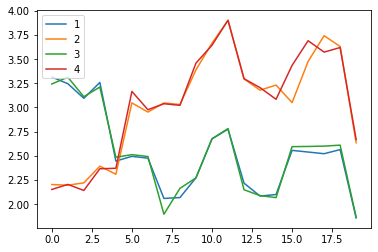

In [33]:
performance = firstten + middle + oneseventwozero
performance = pd.DataFrame(performance, columns=list(range(1, 5)))
performance.plot()

In [34]:
performance.to_csv("model_perf.csv")

Hyperparam Optimization

In [145]:
import itertools

In [187]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes_yr = []  # Store the MAPEs for each params here
mapes_mo = []
mapes_wk = []

In [188]:
# Use cross validation to evaluate all parameters
for params in all_params:
    m_yr = Prophet(**params).fit(feat)  # Fit model with given params
    m_mo = Prophet(**params).fit(feat)
    m_wk = Prophet(**params).fit(feat)
    df_cv_yr = cross_validation(m_yr, initial="365 days", period="330 days", horizon='1 day', parallel="processes")
    df_cv_mo = cross_validation(m_mo, initial="30 days", period="330 days", horizon='1 day', parallel="processes")
    df_cv_wk = cross_validation(m_wk, initial="7 days", period="330 days", horizon='1 day', parallel="processes")
    
    df_p_yr = performance_metrics(df_cv_yr)
    df_p_mo = performance_metrics(df_cv_mo)
    df_p_wk = performance_metrics(df_cv_wk)
    mapes_yr.append(df_p_yr['mape'].values[0])
    mapes_mo.append(df_p_mo['mape'].values[0])
    mapes_wk.append(df_p_wk['mape'].values[0])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 7 forecasts with cutoffs between 2012-07-25 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9092b6100>
INFO:prophet:Making 8 forecasts with cutoffs between 2011-08-30 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9092ace20>
INFO:prophet:Making 8 forecasts with cutoffs between 2011-08-30 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff903827700>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9070d9b80>
INFO:prophet:Making 8 forecasts with cutoffs between 2011-08-30 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9092acdc0>
INFO:prophet:Making 8 forecasts with cutoffs between 2011-08-30 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff90a760fa0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 7 forecasts with cutoffs between 2012-07-25 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.Pro

INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9070d9700>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 7 forecasts with cutoffs between 2012-07-25 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff903c31640>
INFO:prophet:Making 8 forecasts with cutoffs between 2011-08-30 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff9059f7a90>
INFO:prophet:Making 8 forecasts with cutoffs between 2011-08-30 00:00:00 and 2017-12-28 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.Pro

In [196]:
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mape - 1yr'] = mapes_yr
tuning_results['mape - 1mo'] = mapes_mo
tuning_results['mape - 1wk'] = mapes_wk
tuning_results['mape - avg'] = np.array([mapes_yr, mapes_mo, mapes_wk]).mean(axis=0)
tuning_results

,changepoint_prior_scale,seasonality_prior_scale,mape - 1yr,mape - 1mo,mape - 1wk,mape - avg
0,0.001,0.01,0.404979,0.356223,0.356223,0.372475
1,0.001,0.10,0.380059,0.335100,0.335100,0.350086
2,0.001,1.00,0.385848,0.340171,0.340171,0.355397
3,0.001,10.00,0.399376,0.355220,0.355220,0.369939
4,0.010,0.01,0.255733,0.224863,0.224863,0.235153
5,0.010,0.10,0.264668,0.231684,0.231684,0.242679
6,0.010,1.00,0.262809,0.231730,0.231730,0.242090
7,0.010,10.00,0.267770,0.236048,0.236048,0.246622
8,0.100,0.01,0.095412,0.086615,0.086615,0.089547
9,0.100,0.10,0.119173,0.105242,0.105242,0.109886


seasonality_prior_scale,0.01,0.10,1.00,10.00
changepoint_prior_scale,,,,
0.001,0.372475,0.350086,0.355397,0.369939
0.010,0.235153,0.242679,0.242090,0.246622
0.100,0.089547,0.109886,0.112136,0.112708
0.500,0.133463,0.179005,0.185323,0.183209


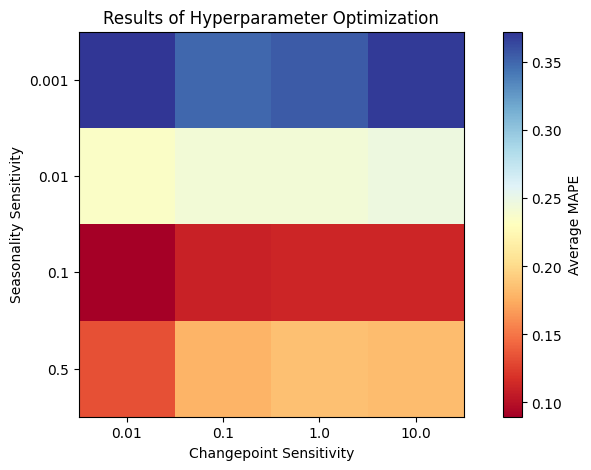

In [230]:
import seaborn as sns
# sns.set()
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
ptable = tuning_results[['changepoint_prior_scale', 
                         'seasonality_prior_scale', 
                         'mape - avg']].pivot(values="mape - avg", index="changepoint_prior_scale", columns="seasonality_prior_scale")
plt.figure(figsize=(10, 5))
# tuning_results['mape - avg'].plot(ax=ax)
# ax.set_xlabel("Parameter Set Index")
# ax.set_ylabel("Average MAPE")
# ax.set_title("Results of Prophet Hyperparameter Optimization")
plt.imshow(ptable, cmap ="RdYlBu")
cbar = plt.colorbar()
cbar.set_label('Average MAPE', rotation=90, loc='center')
plt.xticks(range(len(ptable)), ptable.columns)
plt.yticks(range(len(ptable)), ptable.index)
plt.xlabel("Changepoint Sensitivity")
plt.ylabel("Seasonality Sensitivity")
plt.title("Results of Hyperparameter Optimization")
ptable

Conclusion: changepoint prior scale of 0.1 is clearly best, with lower seasonality prior appearing to work better (probably due to the relatively small amounts of data we're training with)

Also, tests show that 8-10 top components, + Infectious Disease, work across the board in almost halving MAPE.

In [282]:
final_model_1yr = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=0.01)
final_model_1mo = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=0.01)
final_model_1wk = Prophet(changepoint_prior_scale=0.001, seasonality_prior_scale=0.01)

f = [*top_cols[:9], 'INFECTDISEMVTRACKD']
feat, mu, s = columnCleaner("data/observations_train.csv", columns=f, normalize_sp5=False)
cutoff = 500
train_yr = feat.iloc[-(cutoff+365):-cutoff]
test_yr = feat.iloc[-cutoff:]
train_mo = feat.iloc[-(cutoff+30):-cutoff]
test_mo = feat.iloc[-cutoff:]
train_wk = feat.iloc[-(cutoff+7):-cutoff]
test_wk = feat.iloc[-cutoff:]
dropped_cols = ["DEXJPUS", "SOFR", "SOFRVOL"]
for c in f:
    if c not in dropped_cols:
        final_model_1yr.add_regressor(c, standardize=False)
        final_model_1mo.add_regressor(c, standardize=False)
        final_model_1wk.add_regressor(c, standardize=False)

final_model_1yr.fit(train_yr)
final_model_1mo.fit(train_mo)
final_model_1wk.fit(train_wk)
# cv = cross_validation(final_model, initial="30 days", period="10 days", horizon="1 day", parallel="processes")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.


In [283]:
train_yr.tail()

,ds,y,PCUATRNWRATRNWR,PCUATRANSATRANS,PCUATTDSVATTDSV,GVIPT54000S,PCUASTDSVASTDSV,TLAACBW027NBOG,GVIPT52100S,GVIPT54200S,PCUADLVWRADLVWR,INFECTDISEMVTRACKD
2008,2016-08-14,NaN,-0.705211,-1.406592,1.025422,0.755459,1.040661,1.110662,-1.113325,0.926511,0.545363,-0.453966
2009,2016-08-15,2190.15,-0.705211,-1.406592,1.025422,0.755459,1.040661,1.110662,-1.113325,0.926511,0.545363,-0.453966
2010,2016-08-16,2178.15,-0.705211,-1.406592,1.025422,0.755459,1.040661,1.110662,-1.113325,0.926511,0.545363,0.005650
2011,2016-08-17,2182.22,-0.705211,-1.406592,1.025422,0.755459,1.040661,1.110662,-1.113325,0.926511,0.545363,-0.453966
2012,2016-08-18,2187.02,-0.705211,-1.406592,1.025422,0.755459,1.040661,1.079717,-1.113325,0.926511,0.545363,-0.453966


In [284]:
pred_yr = final_model_1yr.predict(test_yr.drop(columns="y"))
pred_mo = final_model_1mo.predict(test_mo.drop(columns="y"))
pred_wk = final_model_1wk.predict(test_wk.drop(columns="y"))

pred_yr.set_index("ds", inplace=True)
pred_mo.set_index("ds", inplace=True)
pred_wk.set_index("ds", inplace=True)

pred_yr.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,GVIPT52100S,GVIPT52100S_lower,GVIPT52100S_upper,GVIPT54000S,GVIPT54000S_lower,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2016-08-19,2078.249409,2148.547869,2212.248139,2078.249409,2078.249409,52.182146,52.182146,52.182146,8.292933,8.292933,...,103.617272,103.617272,103.617272,-0.123575,-0.123575,-0.123575,0.0,0.0,0.0,2181.743106
2016-08-20,2078.952443,2150.292491,2212.188553,2078.952443,2078.952443,52.182146,52.182146,52.182146,8.292933,8.292933,...,103.617272,103.617272,103.617272,-0.396427,-0.396427,-0.396427,0.0,0.0,0.0,2182.173287
2016-08-21,2079.655476,2150.056462,2215.251921,2079.636827,2079.655476,52.182146,52.182146,52.182146,8.292933,8.292933,...,103.617272,103.617272,103.617272,-0.396427,-0.396427,-0.396427,0.0,0.0,0.0,2182.876321
2016-08-22,2080.358510,2152.485562,2214.446075,2079.956829,2080.521577,52.182146,52.182146,52.182146,8.292933,8.292933,...,103.617272,103.617272,103.617272,-1.322976,-1.322976,-1.322976,0.0,0.0,0.0,2182.652806
2016-08-23,2081.061543,2151.031937,2214.356336,2080.227734,2081.584085,52.182146,52.182146,52.182146,8.292933,8.292933,...,103.438421,103.438421,103.438421,-1.980048,-1.980048,-1.980048,0.0,0.0,0.0,2182.519916


(1500.0, 2500.0)

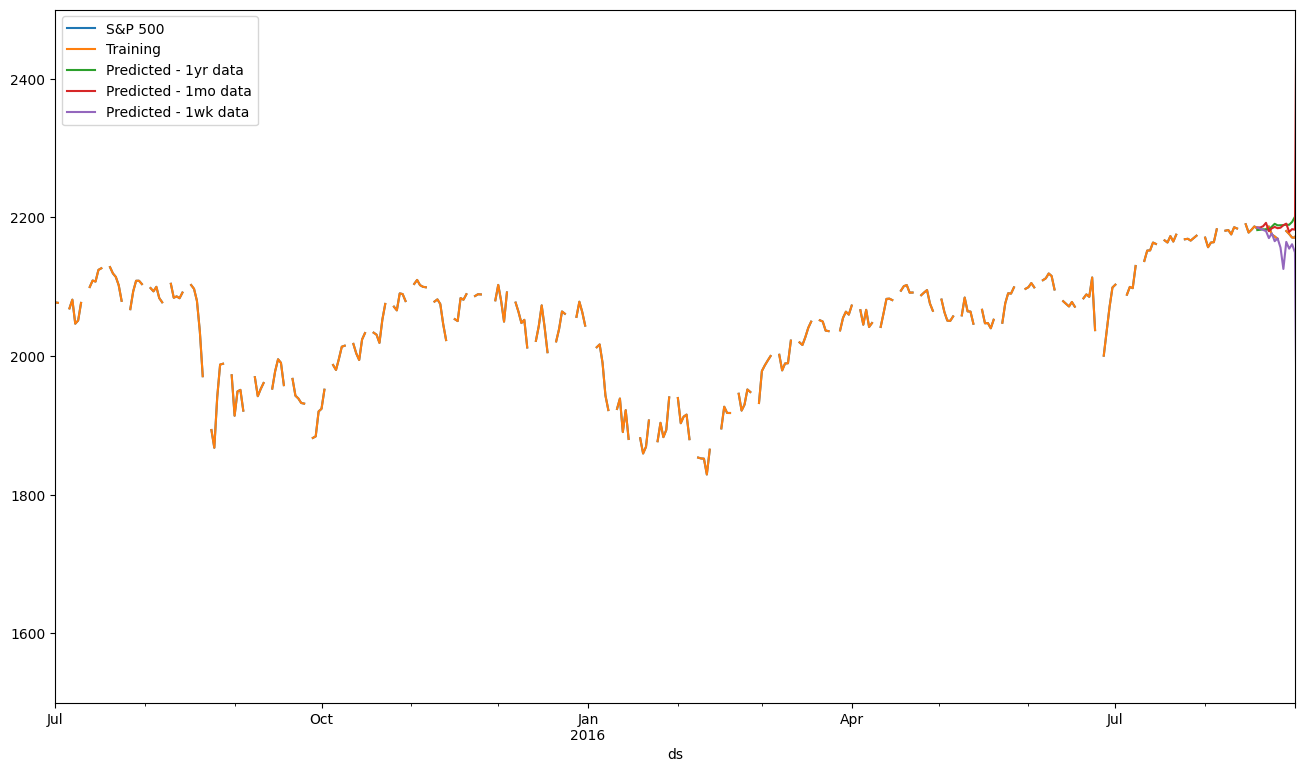

In [285]:
fig, ax = plt.subplots(figsize=(16, 9))

# real S&P500
pivoted = train_obs.pivot_table(values="value", index="date", columns="series_id")
pivoted.set_index(pd.to_datetime(pivoted.index), inplace=True)
sp500 = pivoted.loc[pivoted.index >= "2011-02-14"]['SP500']
sp500.plot(ax=ax, label="S&P 500")


#training data
sp500.plot(ax=ax, label="Training")

#predictions
pred_yr['yhat'].plot(ax=ax, label="Predicted - 1yr data")
pred_mo['yhat'].plot(ax=ax, label="Predicted - 1mo data")
pred_wk['yhat'].plot(ax=ax, label="Predicted - 1wk data")


ax.legend(loc='upper left')
ax.set_xlim(['2015-07-01', '2016-09-01'])
ax.set_ylim([1500, 2500])

In [261]:
pred_1yr = forecastTable(final_model_1yr,
                         1, 
                         "data/observations_train.csv", 
                         "data/observations_test.csv",
                        columns=f)
pred_1yr

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,GVIPT52100S,GVIPT52100S_lower,GVIPT52100S_upper,GVIPT54000S,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-08-20,1958.115845,1827.206517,1888.060135,1958.115845,1958.115845,-91.295719,-91.295719,-91.295719,-19.181778,...,-101.454115,-101.454115,-101.454115,2.923952,2.923952,2.923952,0.0,0.0,0.0,1859.585681
1,2015-08-21,1957.672042,1824.246831,1889.093691,1957.672042,1957.672042,-91.295719,-91.295719,-91.295719,-19.181778,...,-101.260462,-101.260462,-101.260462,-0.123575,-0.123575,-0.123575,0.0,0.0,0.0,1856.288004
2,2015-08-22,1957.228239,1823.195865,1886.540263,1957.228239,1957.228239,-91.295719,-91.295719,-91.295719,-19.181778,...,-102.698334,-102.698334,-102.698334,-0.396427,-0.396427,-0.396427,0.0,0.0,0.0,1854.133478
3,2015-08-23,1956.784437,1821.622116,1885.751036,1956.784437,1956.784437,-91.295719,-91.295719,-91.295719,-19.181778,...,-102.456268,-102.456268,-102.456268,-0.396427,-0.396427,-0.396427,0.0,0.0,0.0,1853.931741
4,2015-08-24,1956.340634,1822.255036,1884.431879,1956.340634,1956.340634,-91.295719,-91.295719,-91.295719,-19.181778,...,-101.638085,-101.638085,-101.638085,-1.322976,-1.322976,-1.322976,0.0,0.0,0.0,1853.379573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2016-08-15,2075.437274,2400.008805,2462.899748,2075.437274,2075.437274,48.698838,48.698838,48.698838,16.809763,...,358.131062,358.131062,358.131062,-1.322976,-1.322976,-1.322976,0.0,0.0,0.0,2432.245360
362,2016-08-16,2076.140308,2399.223058,2464.909270,2076.140308,2076.140308,48.698838,48.698838,48.698838,16.809763,...,357.908361,357.908361,357.908361,-1.980048,-1.980048,-1.980048,0.0,0.0,0.0,2432.068621
363,2016-08-17,2076.843342,2405.223450,2469.493495,2076.843342,2076.843342,48.698838,48.698838,48.698838,16.809763,...,358.131062,358.131062,358.131062,1.295503,1.295503,1.295503,0.0,0.0,0.0,2436.269906
364,2016-08-18,2077.546375,2407.941282,2469.763600,2077.546375,2077.546375,48.698838,48.698838,48.698838,16.809763,...,358.131062,358.131062,358.131062,2.923952,2.923952,2.923952,0.0,0.0,0.0,2438.601389


<AxesSubplot:xlabel='date'>

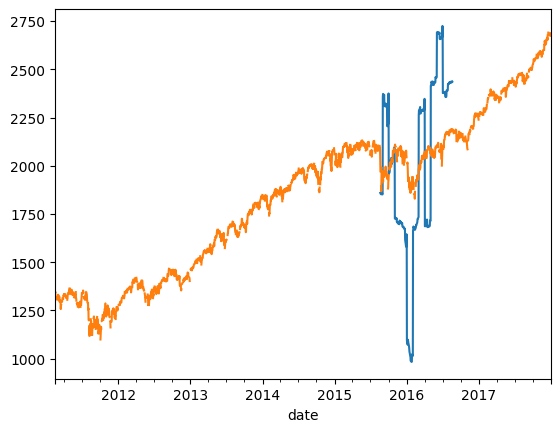

In [281]:
pred_1yr.set_index(pd.to_datetime(pred_1yr.ds))['yhat'].plot()
sp500.plot()